In [ ]:
pip install ktrain

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVIECES"] = "0";

In [5]:
import ktrain
from ktrain import text
from sklearn.datasets import fetch_20newsgroups

In [6]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med', 'rec.sport.baseball']

In [7]:
train = fetch_20newsgroups(
    subset = 'train',
    categories = categories,
    shuffle = True,
    random_state = 0
)

test = fetch_20newsgroups(
    subset = 'test',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [8]:
test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [9]:
print(test.filenames)

['/root/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/53498'
 '/root/scikit_learn_data/20news_home/20news-bydate-test/soc.religion.christian/21494'
 '/root/scikit_learn_data/20news_home/20news-bydate-test/rec.sport.baseball/104969'
 ...
 '/root/scikit_learn_data/20news_home/20news-bydate-test/rec.sport.baseball/104817'
 '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59640'
 '/root/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/54261']


In [10]:
print("size of training set:", len(train['data']))
print("size of validation set:", len(test["data"]))
print("classes:", train.target_names)

size of training set: 2854
size of validation set: 1899
classes: ['alt.atheism', 'comp.graphics', 'rec.sport.baseball', 'sci.med', 'soc.religion.christian']


In [11]:
x_train = train.data
y_train = train.target

x_test = test.data
y_test = test.target

In [12]:
len(x_train), len(x_test)

(2854, 1899)

In [13]:
#x_train

- 0 = 'alt.atheism'
- 1 = 'comp.graphics'
- 2 =  'rec.sport.baseball' 
- 3 = 'sci.med'
- 4 = 'soc.religion.christian'

In [34]:
y_train

array([2, 1, 4, ..., 0, 2, 3])

# Model with Transformer

- Pretrained_model : "DistilBERT" / small and fast

In [14]:
model_name = "distilbert-base-uncased"

trans = text.Transformer(model_name = model_name,
                         maxlen = 512,
                         class_names = categories
                         )

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [15]:
train_data = trans.preprocess_train(x_train, y_train)
test_data = trans.preprocess_test(x_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 291
	95percentile : 820
	99percentile : 1757


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 323
	95percentile : 894
	99percentile : 2394


In [16]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

In [17]:
learner = ktrain.get_learner(model, 
                             train_data = train_data, 
                             val_data = test_data, 
                             batch_size = 16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
178/178 [==============================] - 335s 2s/step - loss: 1.6015 - accuracy: 0.2293
Epoch 2/10
178/178 [==============================] - 309s 2s/step - loss: 1.3897 - accuracy: 0.5839
Epoch 3/10
178/178 [==============================] - 309s 2s/step - loss: 0.4538 - accuracy: 0.9094
Epoch 4/10
178/178 [==============================] - 309s 2s/step - loss: 0.2055 - accuracy: 0.9433
Epoch 5/10
178/178 [==============================] - 309s 2s/step - loss: 0.9097 - accuracy: 0.6572
Epoch 6/10
178/178 [==============================] - 10s 48ms/step - loss: 1.6231 - accuracy: 0.1860


done.
Visually inspect loss plot and select learning rate associated with falling loss


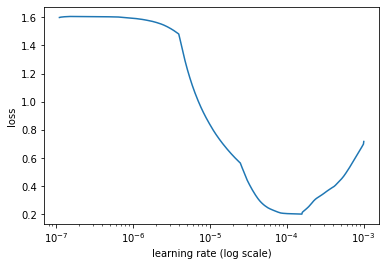

In [27]:
# 최적 하이퍼파라미터 값 찾기 (시간오래걸림)
learner.lr_find(show_plot = True,
                max_epochs = 10)

# 모델 학습

In [18]:
learner.fit_onecycle(1e-4, 1)



begin training using onecycle policy with max lr of 0.0001...
179/179 [==============================] - 399s 2s/step - loss: 0.5216 - accuracy: 0.8441 - val_loss: 0.2199 - val_accuracy: 0.9279


In [ ]:
learner

In [20]:
# Plotting The Confusion Matrix
learner.validate(class_names = categories)

                        precision    recall  f1-score   support

           alt.atheism       0.87      0.80      0.83       319
soc.religion.christian       0.97      0.93      0.95       389
         comp.graphics       0.99      0.95      0.97       397
               sci.med       0.96      0.96      0.96       396
    rec.sport.baseball       0.85      0.97      0.91       398

              accuracy                           0.93      1899
             macro avg       0.93      0.92      0.92      1899
          weighted avg       0.93      0.93      0.93      1899



array([[255,   1,   1,   6,  56],
       [ 14, 363,   4,   5,   3],
       [  6,   4, 378,   5,   4],
       [  9,   4,   0, 380,   3],
       [  8,   3,   0,   1, 386]])

In [22]:
learner.view_top_losses(n = 5, preproc = trans)

----------
id:389 | loss:5.4 | true:comp.graphics | pred:sci.med)

----------
id:1735 | loss:5.3 | true:comp.graphics | pred:rec.sport.baseball)

----------
id:730 | loss:5.18 | true:alt.atheism | pred:sci.med)

----------
id:311 | loss:5.18 | true:sci.med | pred:alt.atheism)

----------
id:1425 | loss:5.17 | true:rec.sport.baseball | pred:sci.med)



In [24]:
x_test[389]

'From: C Robert Claydon <cclaydon@magnus.acs.ohio-state.edu>\nSubject: CUB fever.\nOrganization: The Ohio State University\nX-Mailer: ELM [version 2.3 PL11]\nLines: 13\n\nkingoz@camelot.bradley.edu (Orin Roth) writes:\n>   CUB fever is hitting me again. I\'m beginning to think they have a\n>   chance this year. (what the heck am i thinking?)\n>   Sorry. Just a moment of incompetence.\n>   I\'ll be ok. Really.\n>   Orin.\n>   Bradley U.\n\nYou sure?  This maybe a chronic syndrome.  If it persists, we may have to \nbanish you to the "Cub-crazy Sanatarium" in north Chicago...\n:-):-):-)\n\nRob\n'

# Predict on new data

In [25]:
predictor = ktrain.get_predictor(learner.model, preproc = trans)

In [26]:
x = 'Jesus Christ is the central figure of Christianity'

In [27]:
# 학습 epoch을 1번으로 가져갔기때문에 올바른 예측이 불가
predictor.predict(x)

'rec.sport.baseball'

In [29]:
# 문장을 바꿔서 다시 시도해보자
x = "I have a 42 yr old male friend, misdiagnosed as having osteopporosis for two years, who recently \
found out that his illness is the rare Gaucher's disease."

In [30]:
predictor.predict(x)

'sci.med'

In [36]:
!pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [37]:
predictor.explain(x)

In [33]:
predictor.save('distilbert-model')